# Decision Tree Assessment 4

# Import libraries and load data set

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

warnings.filterwarnings("ignore")

# Set a consistent style
sns.set(style="whitegrid")


# Load dataset
obesity_df = pd.read_csv("obesity.csv")

# Descriptive statistics and Data info

In [2]:
# Quick check of data
print(obesity_df.head())
print(obesity_df.info())
print(obesity_df.describe())

   Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0   56    Male  173.575262  71.982051  23.891783                      4   
1   69    Male  164.127306  89.959256  33.395209                      2   
2   46  Female  168.072202  72.930629  25.817737                      4   
3   32    Male  168.459633  84.886912  29.912247                      3   
4   60    Male  183.568568  69.038945  20.487903                      3   

  ObesityCategory  
0   Normal weight  
1           Obese  
2      Overweight  
3      Overweight  
4   Normal weight  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI    

# Exploratory Data Analysis

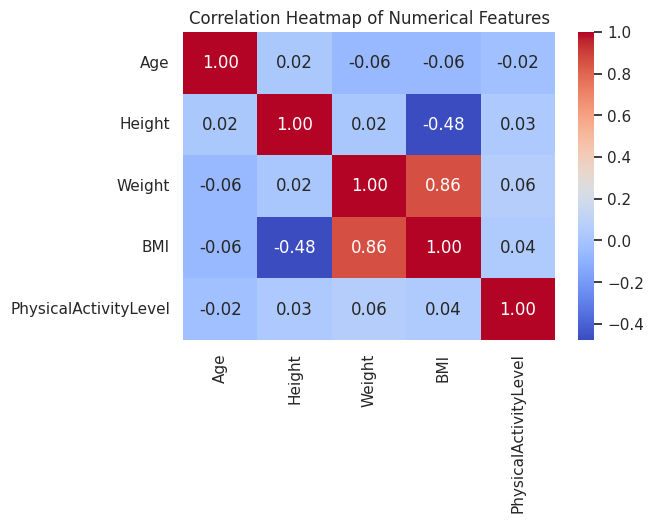

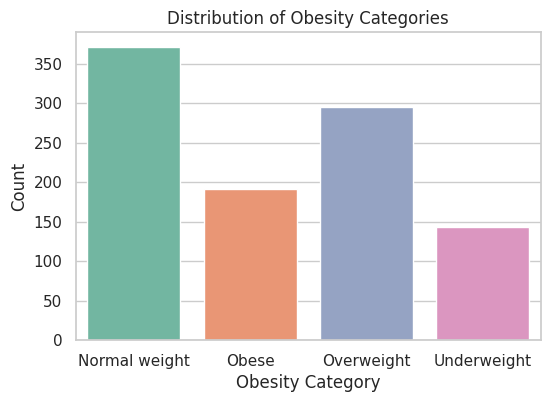

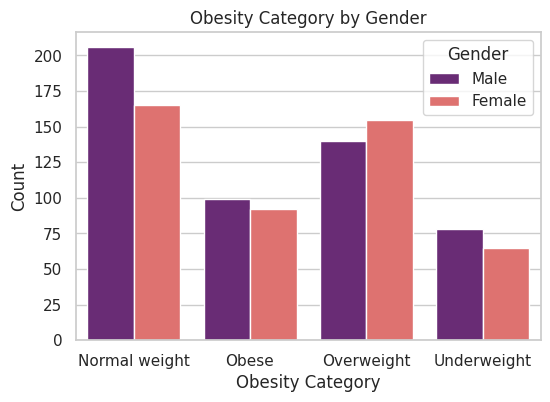

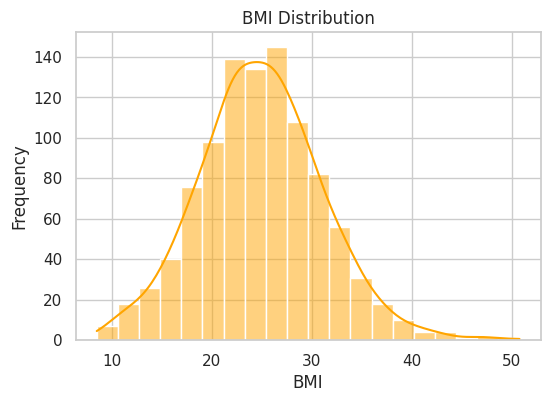

In [3]:

# 1. Correlation heatmap (numerical features)
plt.figure(figsize=(6,4))
corr = obesity_df[["Age", "Height", "Weight", "BMI", "PhysicalActivityLevel"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# 2. Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x="ObesityCategory", data=obesity_df, palette="Set2")
plt.title("Distribution of Obesity Categories")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.show()

# 3. Gender distribution across obesity categories
plt.figure(figsize=(6,4))
sns.countplot(x="ObesityCategory", hue="Gender", data=obesity_df, palette="magma")
plt.title("Obesity Category by Gender")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.show()


# 4. BMI distribution
plt.figure(figsize=(6,4))
sns.histplot(obesity_df["BMI"], bins=20, kde=True, color="orange")
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()




# Data Preprocessing

In [4]:
# Data Preprocessing

# Encode categorical variables
le_gender = LabelEncoder()
obesity_df["Gender"] = le_gender.fit_transform(obesity_df["Gender"])

le_obesity = LabelEncoder()
obesity_df["ObesityCategory"] = le_obesity.fit_transform(obesity_df["ObesityCategory"])

# Define features (X) and target (y)
X = obesity_df.drop("ObesityCategory", axis=1)
y = obesity_df["ObesityCategory"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Model Training

In [5]:
#Model training

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Evaluation

Model Accuracy: 1.00
Model Precision (macro): 1.00
Model Recall (macro): 1.00
Model F1-score (macro): 1.00

Classification Report:
                precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00        74
        Obese       1.00      1.00      1.00        38
   Overweight       1.00      1.00      1.00        59
  Underweight       1.00      1.00      1.00        29

     accuracy                           1.00       200
    macro avg       1.00      1.00      1.00       200
 weighted avg       1.00      1.00      1.00       200



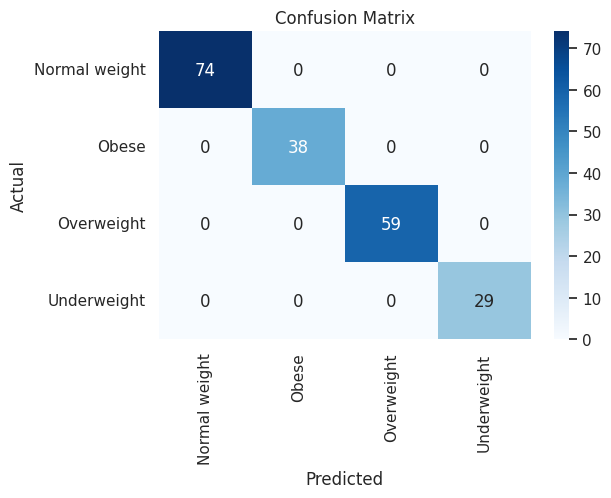

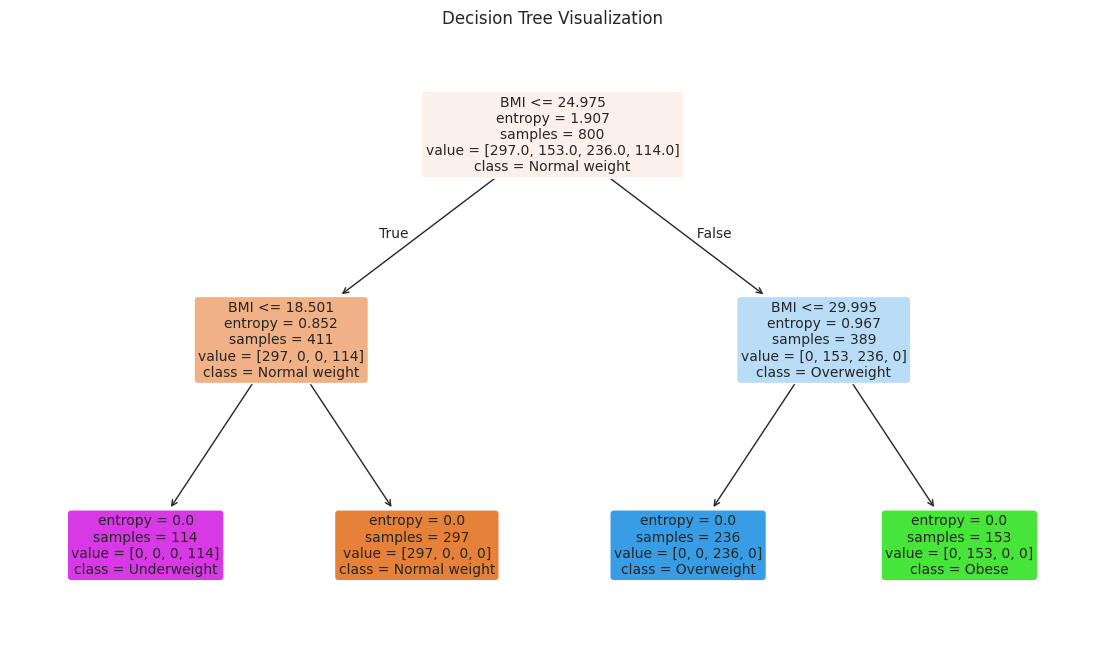

In [6]:
# Model Evaluation

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-score (macro = treats all classes equally)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision (macro): {precision:.2f}")
print(f"Model Recall (macro): {recall:.2f}")
print(f"Model F1-score (macro): {f1:.2f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_obesity.classes_))

# Confusion matrix heatmap
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_obesity.classes_,
            yticklabels=le_obesity.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize decision tree
plt.figure(figsize=(14,8))
plot_tree(clf, feature_names=X.columns, class_names=le_obesity.classes_,
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()